In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

def unique_col_values(df):
    l = []
    index = df.columns
    columns = ['Uniques', 'DT', 'Nulls (%)', 'Null Count']
    for column in index:
        u = len(df[column].unique())
        c = len(df[column])
        n = df[column].isnull().sum()
        l.append([u, df[column].dtype, n/c*100, n])
        
    return pd.DataFrame(l,index=index,columns=columns).sort_values(by='Nulls (%)', ascending=False) 

In [128]:
# Load the train and test datasets to create two DataFrames
train = pd.read_csv('data/train.csv')
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
train[train['Cabin'] == 'G6']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S


In [131]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [105]:
target = train['Survived'].values
del train['Survived']
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
test = pd.read_csv('data/test.csv')
holdout_ids = test['PassengerId']
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

train['Fare'].fillna(train['Fare'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
numeric_variables = list(train.dtypes[train.dtypes != 'object'].index)
train[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [109]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(train[numeric_variables], target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [110]:
model.oob_score_

0.1361695005913669

In [111]:
target_oob = model.oob_prediction_
print('c-stat: {}'.format(roc_auc_score(target, target_oob)))

c-stat: 0.7399551550399983


In [112]:
def describe_categorical(df):
    from IPython.display import display, HTML
    display(HTML(df[df.columns[df.dtypes == 'object']].describe().to_html()))

In [113]:
describe_categorical(train)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carter, Rev. Ernest Courtenay",male,347082,G6,S
freq,1,577,7,4,644


In [114]:
train.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)
test.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

In [115]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
    
train['Cabin'] = train['Cabin'].apply(clean_cabin)
test['Cabin'] = test['Cabin'].apply(clean_cabin)

In [116]:
categorical_variables = ['Sex','Cabin','Embarked']

for v in categorical_variables:
    train[v].fillna('Missing', inplace=True)
    test[v].fillna('Missing', inplace=True)
    dummies = pd.get_dummies(train[v], prefix=v)
    train = pd.concat([train,dummies], axis=1)
    del train[v]
    dummies = pd.get_dummies(test[v], prefix=v)
    test = pd.concat([test,dummies], axis=1)
    del test[v]

In [117]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [118]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(train, target)
print('C-stat: {0}'.format(roc_auc_score(target, model.oob_prediction_)))

C-stat: 0.8635211282608464


### Variable importance measures

In [79]:
model.feature_importances_

array([  9.11384671e-02,   2.38891052e-01,   4.43567267e-02,
         2.15831071e-02,   2.15047796e-01,   1.43423437e-01,
         1.58822440e-01,   2.95342368e-03,   3.79055011e-03,
         6.47116172e-03,   4.30998991e-03,   8.59480266e-03,
         1.02403226e-03,   8.12054428e-04,   2.67741854e-02,
         6.64265010e-05,   1.06189189e-02,   0.00000000e+00,
         6.00379221e-03,   1.53176370e-02])

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


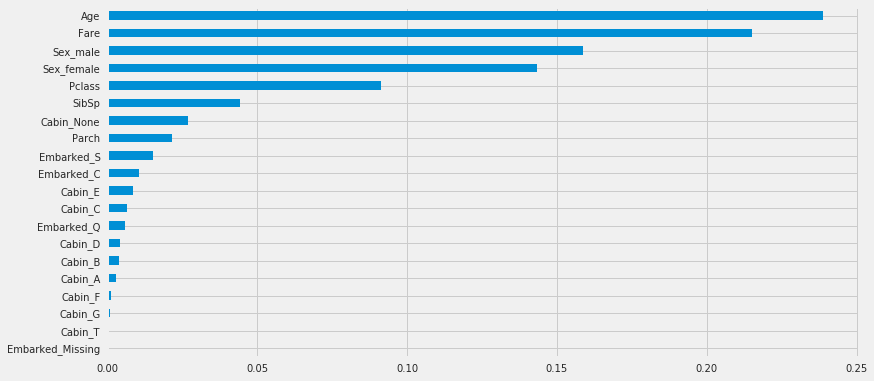

In [80]:
feature_importances = pd.Series(model.feature_importances_, index=train.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(12,6))


In [31]:
feature_importances

Embarked_Missing    0.000000
Cabin_T             0.000066
Cabin_G             0.000812
Cabin_F             0.001024
Cabin_A             0.002953
Cabin_B             0.003791
Cabin_D             0.004310
Embarked_Q          0.006004
Cabin_C             0.006471
Cabin_E             0.008595
Embarked_C          0.010619
Embarked_S          0.015318
Parch               0.021583
Cabin_None          0.026774
SibSp               0.044357
Pclass              0.091138
Sex_female          0.143423
Sex_male            0.158822
Fare                0.215048
Age                 0.238891
dtype: float64

In [32]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico | http://bernico.net/
    """
    if autoscale:
        x_scale = model.feature_importances_.max()+headroom
    else:
        x_scale = 1
        
    feature_dict = dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        # some dummy columns need to be summarized
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i)
            
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name] = sum_value
    
    results = pd.DataFrame.from_dict(feature_dict, orient='index').rename(columns={0:'Importance'})
    results.sort_values(by='Importance',inplace=True)
    results.plot(kind="barh", figsize=(width, len(results)/4), xlim=(0, x_scale))

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


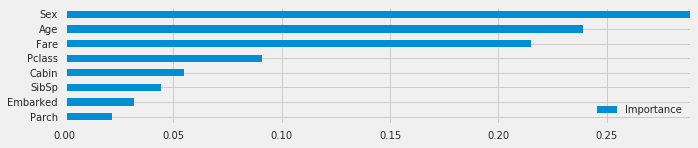

In [33]:
graph_feature_importances(model, train.columns, summarized_columns=categorical_variables)

In [34]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)

5.92 µs ± 134 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [35]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)

6.04 µs ± 243 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### n-estimators

30 trees
C-stat:  0.853870407652

50 trees
C-stat:  0.860698345743

100 trees
C-stat:  0.863521128261

200 trees
C-stat:  0.862192290076

500 trees
C-stat:  0.863739494456

1000 trees
C-stat:  0.864043076726

2000 trees
C-stat:  0.863449227197



/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


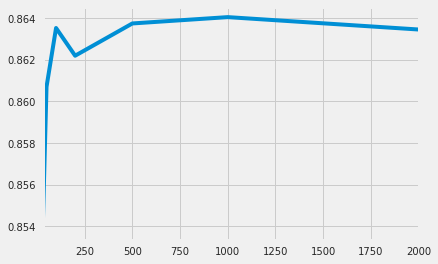

In [36]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(train, target)
    print(trees, 'trees')
    roc = roc_auc_score(target, model.oob_prediction_)
    print('C-stat: ', roc)
    results.append(roc)
    print("")
    
pd.Series(results, n_estimator_options).plot();

### max_features

2000 trees
C-stat:  0.863449227197

2000 trees
C-stat:  0.863449227197

2000 trees
C-stat:  0.863449227197

2000 trees
C-stat:  0.863449227197

2000 trees
C-stat:  0.863449227197

2000 trees
C-stat:  0.863449227197



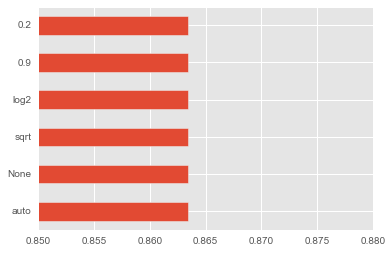

In [108]:
results = []
max_features_options = ['auto', None, 'sqrt', 'log2', 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(train, target)
    print(trees, 'trees')
    roc = roc_auc_score(target, model.oob_prediction_)
    print('C-stat: ', roc)
    results.append(roc)
    print("")
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

### min_samples_leaf

1 min samples
C-stat:  0.864043076726

2 min samples
C-stat:  0.869654022731

3 min samples
C-stat:  0.871571384442

4 min samples
C-stat:  0.873478094142

5 min samples
C-stat:  0.874269005848

6 min samples
C-stat:  0.874029335634

7 min samples
C-stat:  0.873304998988

8 min samples
C-stat:  0.871866977705

9 min samples
C-stat:  0.869294517411

10 min samples
C-stat:  0.867430415748



/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


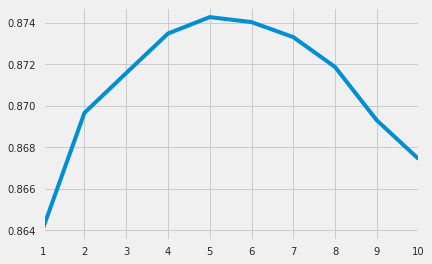

In [37]:
results = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000,
                                 oob_score=True,
                                 n_jobs=-1,
                                 random_state=42,
                                 max_features="auto",
                                 min_samples_leaf=min_samples)
    model.fit(train, target)
    print(min_samples,"min samples")
    roc = roc_auc_score(target, model.oob_prediction_)
    print("C-stat: ",roc)
    results.append(roc)
    print("")
    
pd.Series(results, min_samples_leaf_options).plot()

## Final Model

In [119]:
model = RandomForestRegressor(n_estimators=1000,
                             oob_score=True,
                             n_jobs=-1,
                             random_state=42,
                             max_features="auto",
                             min_samples_leaf=5)

model.fit(train, target)
roc = roc_auc_score(target, model.oob_prediction_)
print("C-stat: ",roc)
results.append(roc)
print("")

C-stat:  0.874269005848



In [121]:
test['Cabin_T'] = 0
test['Embarked_Missing'] = 0
predictions = model.predict(test)

In [122]:
submission_df = {'PassengerId':holdout_ids,
                 'Survived':predictions}
submission = pd.DataFrame(submission_df)
submission.head()

,PassengerId,Survived
0,892,0.095054
1,893,0.556009
2,894,0.146745
3,895,0.250313
4,896,0.472706


In [124]:
submission['Survived'] = submission['Survived'].round().astype(int)

In [126]:
submission.to_csv('data/submission_rf.csv',index=False)

In [86]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [87]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,0,0,0,0,0,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,0,0,0,0,0,1,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,0,0,0,0,0,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,0,0,0,0,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,0,0,0,0,0,1,0,0,1


In [88]:
train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_None', 'Cabin_T', 'Embarked_C', 'Embarked_Missing',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [89]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_None', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [93]:
test.shape

(418, 20)

In [94]:
testx

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S,Cabin_T,Embarked_Missing
0,3,34.50000,0,0,7.8292,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1,3,47.00000,1,0,7.0000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,2,62.00000,0,0,9.6875,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
3,3,27.00000,0,0,8.6625,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4,3,22.00000,1,1,12.2875,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5,3,14.00000,0,0,9.2250,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
6,3,30.00000,0,0,7.6292,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7,2,26.00000,1,1,29.0000,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
8,3,18.00000,0,0,7.2292,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9,3,21.00000,2,0,24.1500,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
